In [52]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

In [2]:
plt.rcParams['pdf.fonttype']=42 #ensures true fonte types are embedded in the pdf 
plt.rcParams['ps.fonttype']=42 # Applies the same setting for post script output

In [3]:
number_of_runs=5
significance_level=1.96 # for 95% ci
height = 6
font_size=11
rotation_degree =15

In [4]:
base_directory="./TPR_GAPS/"


In [5]:
seed_19_sex = pd.read_csv(base_directory+"Run_seed19_TPR_GAP_sex.csv",index_col=0)
seed_31_sex = pd.read_csv(base_directory+"Run_seed31_TPR_GAP_sex.csv",index_col=0)
seed_38_sex = pd.read_csv(base_directory+"Run_seed38_TPR_GAP_sex.csv",index_col=0)
seed_47_sex = pd.read_csv(base_directory+"Run_seed47_TPR_GAP_sex.csv",index_col=0)
seed_77_sex = pd.read_csv(base_directory+"Run_seed77_TPR_GAP_sex.csv",index_col=0)
seed_77_sex.head(5)

,diseases,%M,Gap_M,%F,Gap_F
0,Enlarged Cardiomediastinum,0.590641,0.024971,0.409359,-0.024971
1,Cardiomegaly,0.590760,0.034189,0.409240,-0.034189
2,Lung Opacity,0.586707,0.026680,0.413293,-0.026680
3,Lung Lesion,0.579168,0.053898,0.420832,-0.053898
4,Edema,0.583372,0.021494,0.416628,-0.021494


In [6]:
seed_19_age = pd.read_csv(base_directory+"Run_seed19_TPR_GAP_Age.csv",index_col=0)
seed_31_age = pd.read_csv(base_directory+"Run_seed31_TPR_GAP_Age.csv",index_col=0)
seed_38_age = pd.read_csv(base_directory+"Run_seed38_TPR_GAP_Age.csv",index_col=0)
seed_47_age = pd.read_csv(base_directory+"Run_seed47_TPR_GAP_Age.csv",index_col=0)
seed_77_age = pd.read_csv(base_directory+"Run_seed77_TPR_GAP_Age.csv",index_col=0)
seed_77_age.head(5)

,diseases,%60-80,Gap_60-80,%40-60,Gap_40-60,%20-40,Gap_20-40,%80+,Gap_80+,%0-20,Gap_0-20
0,Enlarged Cardiomediastinum,0.388536,0.018211,0.260563,0.000000,0.090413,-0.018666,0.196880,0.036415,0.005982,-0.026321
1,Cardiomegaly,0.291435,0.014136,0.191014,-0.006619,0.062713,-0.021573,0.153373,0.026771,0.004546,0.000000
2,Lung Opacity,0.300723,0.024984,0.205451,0.000000,0.075250,-0.014694,0.140990,0.029567,0.004839,-0.002766
3,Lung Lesion,0.330440,0.039869,0.233463,0.000000,0.128405,0.032984,0.111045,-0.021899,0.006884,-0.076979
4,Edema,0.309994,0.025760,0.198770,-0.000389,0.071212,0.000000,0.159677,0.032086,0.004680,-0.042728


In [7]:
seed_19_race = pd.read_csv(base_directory+"Run_seed19_TPR_GAP_race.csv",index_col=0)
seed_31_race = pd.read_csv(base_directory+"Run_seed31_TPR_GAP_race.csv",index_col=0)
seed_38_race = pd.read_csv(base_directory+"Run_seed38_TPR_GAP_race.csv",index_col=0)
seed_47_race = pd.read_csv(base_directory+"Run_seed47_TPR_GAP_race.csv",index_col=0)
seed_77_race = pd.read_csv(base_directory+"Run_seed77_TPR_GAP_race.csv",index_col=0)
seed_77_race.head(3)

,diseases,%White,Gap_White,%Black,Gap_Black,%Hisp,Gap_Hisp,%Other,Gap_Other,%Asian,Gap_Asian,%American,Gap_American
0,Enlarged Cardiomediastinum,0.652582,0.024996,0.067697,-0.041410,0.029683,-0.024996,0.131228,0.067900,0.104574,0.076195,0.014236,-0.033246
1,Cardiomegaly,0.653340,-0.008191,0.096945,-0.104322,0.039580,-0.134464,0.110517,0.083168,0.087919,0.095296,0.011700,0.008191
2,Lung Opacity,0.665128,0.003401,0.087931,-0.136037,0.033370,-0.109411,0.112625,0.104477,0.089933,0.121934,0.011012,-0.003401


In [8]:
diseases = ['Lung Opacity', 'Atelectasis', 'Cardiomegaly',
       'Consolidation', 'Edema', 'Enlarged Cardiomediastinum', 'Fracture',
       'Lung Lesion', 'Pleural Effusion', 'Pleural Other',
       'Pneumonia', 'Pneumothorax', 'Support Devices']

diseases_abbr = {'Cardiomegaly': 'Cardiomegaly',
                'Effusion': 'Effusion',
                'Enlarged Cardiomediastinum': 'Enlarged Card.',
                'Lung Lesion': 'Lung Lesion',
                'Atelectasis': 'Atelectasis',
                'Pneumonia': 'Pneumonia',
                'Pneumothorax': 'Pneumothorax',
                'Consolidation': 'Consolidation',
                'Edema': 'Edema',
                'Pleural Effusion': 'Effusion',
                'Pleural Other': 'Pleural Other',
                'Fracture': 'Fracture',
                'Support Devices': 'Sup. Devices',
                'Lung Opacity': 'Air. Opacity',
                }


## 1. Gender

In [9]:
sex_dataframes = [seed_19_sex, seed_31_sex, seed_38_sex, seed_47_sex, seed_77_sex]
result_sex = pd.concat(sex_dataframes)


In [10]:
result_sex_grouped =result_sex.groupby("diseases")
result_sex_grouped_Stat = result_sex_grouped.describe()

In [11]:
sex_df_male_mean = result_sex_grouped_Stat['%M']['mean']

sex_df_male_gap = result_sex_grouped_Stat['Gap_M']["mean"]
sex_df_male_ci = significance_level * result_sex_grouped_Stat['Gap_M']["std"] / np.sqrt(number_of_runs)

sex_df_female_mean = result_sex_grouped_Stat['%F']['mean']
sex_df_female_gap = result_sex_grouped_Stat['Gap_F']["mean"]
sex_df_female_ci = significance_level * result_sex_grouped_Stat['Gap_F']["std"] / np.sqrt(number_of_runs)


In [12]:
#Want = pd.DataFrame(pd.DataFrame(diseases, columns=["diseases"]))
percent_male_list = []
ci_male_list = []
gap_male_mean_list = []

diseases_abbr_list = []
distance_list = []

percent_female_list = []
ci_female_list = []
percent_female_list = []
gap_femal_mean_list = []

In [13]:
for disease in diseases:
  percent_male_list.append(sex_df_male_mean[disease])
  gap_male_mean_list.append(sex_df_male_gap[disease])
  ci_male_list.append(sex_df_male_ci[disease])

  percent_female_list.append(sex_df_female_mean[disease])
  gap_femal_mean_list.append(sex_df_female_gap[disease])
  ci_female_list.append(sex_df_female_ci[disease])

  distance_list.append(np.absolute(sex_df_female_gap[disease] - sex_df_male_gap[disease]))
  diseases_abbr_list.append(diseases_abbr[disease])

d = {'diseases': diseases, 'diseases_abbr': diseases_abbr_list, 'Distance': distance_list,
     "%M": percent_male_list, 'Gap_M_mean': gap_male_mean_list, 'CI_M': ci_male_list,
     "%F": percent_female_list, 'Gap_F_mean': gap_femal_mean_list, 'CI_F': ci_female_list
     }

sex_tpr_disp_df = pd.DataFrame(d)
sex_tpr_disp_df = sex_tpr_disp_df.sort_values(by ='Distance' )

In [14]:
sex_tpr_disp_df

,diseases,diseases_abbr,Distance,%M,Gap_M_mean,CI_M,%F,Gap_F_mean,CI_F
6,Fracture,Fracture,0.007424,0.580007,0.003712,0.004315,0.419993,-0.003712,0.004315
8,Pleural Effusion,Effusion,0.020991,0.587992,0.010496,0.006633,0.412008,-0.010496,0.006633
10,Pneumonia,Pneumonia,0.021878,0.592688,-0.010939,0.007882,0.407312,0.010939,0.007882
3,Consolidation,Consolidation,0.023437,0.590824,-0.011718,0.003952,0.409176,0.011718,0.003952
12,Support Devices,Sup. Devices,0.024627,0.602018,0.012313,0.002043,0.397982,-0.012313,0.002043
11,Pneumothorax,Pneumothorax,0.028360,0.589968,-0.014180,0.005093,0.410032,0.014180,0.005093
4,Edema,Edema,0.040258,0.583372,0.020129,0.001994,0.416628,-0.020129,0.001994
9,Pleural Other,Pleural Other,0.044211,0.585197,0.022106,0.008433,0.414803,-0.022106,0.008433
5,Enlarged Cardiomediastinum,Enlarged Card.,0.047988,0.590641,0.023994,0.003338,0.409359,-0.023994,0.003338
0,Lung Opacity,Air. Opacity,0.056240,0.586707,0.028120,0.003342,0.413293,-0.028120,0.003342


In [15]:
sex_tpr_disp_df.to_csv(base_directory+"sex_tpr_disp.csv")

In [16]:
plt.rcParams['pdf.fonttype']=42 #ensures true fonte types are embedded in the pdf 
plt.rcParams['ps.fonttype']=42 # Applies the same setting for post script output

<Figure size 1600x600 with 0 Axes>

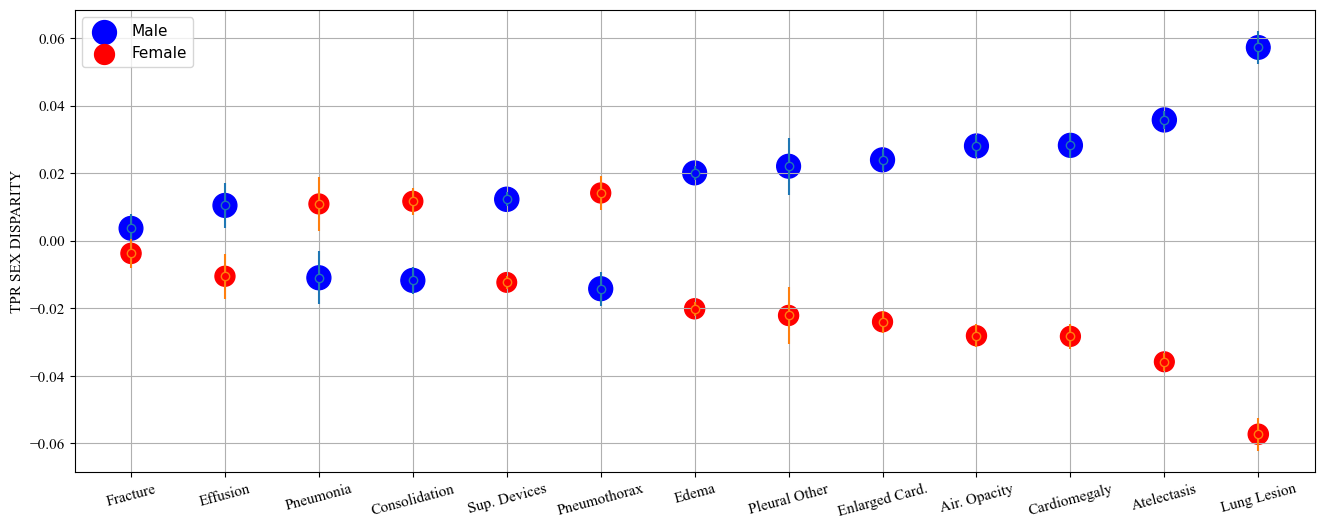

In [17]:
plt.rcParams.update({'font.size': font_size})
plt.figure(figsize=(16,height))

plt.rcParams.update({'font.size': font_size})

plt.figure(figsize=(16,height))
plt.scatter(sex_tpr_disp_df['diseases_abbr'],sex_tpr_disp_df['Gap_M_mean'],
            s= np.multiply(sex_tpr_disp_df['%M'],500), marker='o',color='blue', label="Male")
plt.errorbar(sex_tpr_disp_df['diseases_abbr'],sex_tpr_disp_df['Gap_M_mean'],
             yerr = sex_tpr_disp_df['CI_M'],fmt='o',mfc='blue')
plt.scatter(sex_tpr_disp_df['diseases_abbr'],sex_tpr_disp_df['Gap_F_mean'],
            s= np.multiply(sex_tpr_disp_df['%F'],500), marker='o',color='red', label="Female")
plt.errorbar(sex_tpr_disp_df['diseases_abbr'],sex_tpr_disp_df['Gap_F_mean'],
             yerr = sex_tpr_disp_df['CI_F'],fmt='o',mfc='red')

plt.xticks(rotation=rotation_degree,fontsize=font_size,fontname='Times New Roman')
plt.yticks(fontsize=font_size,fontname='Times New Roman')
plt.ylabel("TPR SEX DISPARITY",fontsize=font_size,fontname='Times New Roman')
plt.legend()
plt.grid(True)
plt.savefig(base_directory+"TPR_Dis_SEX.pdf",bbox_inches='tight')


## 2. Age

In [18]:
age_dataframes = [seed_19_age, seed_31_age, seed_38_age, seed_47_age, seed_77_age]
result_age_df= pd.concat(age_dataframes)

result_age_grouped =result_age_df.groupby("diseases")
result_age_grouped_stat = result_age_grouped.describe()


In [19]:
age_df_40_mean = result_age_grouped_stat['%40-60']['mean']
age_df_40_gap = result_age_grouped_stat['Gap_40-60']["mean"]
age_df_40_ci = significance_level*result_age_grouped_stat['Gap_40-60']["std"]/np.sqrt(number_of_runs)

In [20]:
age_df_60_mean = result_age_grouped_stat['%60-80']['mean']
age_df_60_gap = result_age_grouped_stat['Gap_60-80']["mean"]
age_df_60_ci = significance_level*result_age_grouped_stat['Gap_60-80']["std"]/np.sqrt(number_of_runs)

In [21]:
age_df_20_mean = result_age_grouped_stat['%20-40']['mean']
age_df_20_gap = result_age_grouped_stat['Gap_20-40']["mean"]
age_df_20_ci = significance_level*result_age_grouped_stat['Gap_20-40']["std"]/np.sqrt(number_of_runs)

In [22]:
age_df_80_mean = result_age_grouped_stat['%80+']['mean']
age_df_80_gap = result_age_grouped_stat['Gap_80+']["mean"]
age_df_80_ci = significance_level*result_age_grouped_stat['Gap_80+']["std"]/np.sqrt(number_of_runs)

In [23]:
age_df_0_mean = result_age_grouped_stat['%0-20']['mean']
age_df_0_gap = result_age_grouped_stat['Gap_0-20']["mean"]
age_df_0_ci = significance_level*result_age_grouped_stat['Gap_0-20']["std"]/np.sqrt(number_of_runs)

In [24]:
age_tpr_disp=pd.DataFrame(pd.DataFrame(diseases, columns=["diseases"]))

In [25]:
prcent_40_list = []
ci_40_list = []
gap_40_mean_list = []
diseases_abbr_list = []
distance_list = []

prcent_60_list = []
ci_60_list = []
prcent_60_list = []
gap_60_mean_list = []

prcent_20_list = []
ci_20_list = []
prcent_20_list = []
gap_20_mean_list = []

prcent_80_list = []
ci_80_list = []
prcent_80_list = []
gap_80_mean_list = []

prcent_0_list = []
ci_0_list = []
prcent_0_list = []
gap_0_mean_list = []
mean_list = []


In [26]:
for disease in diseases:
    mean_list = []
    cleaned_mean_gap_list = []
    prcent_40_list.append(age_df_40_mean[disease])
    gap_40_mean_list.append(age_df_40_gap[disease])
    ci_40_list.append(age_df_40_ci[disease])
    mean_list.append(age_df_40_gap[disease])

    prcent_60_list.append(age_df_60_mean[disease])
    gap_60_mean_list.append(age_df_60_gap[disease])
    ci_60_list.append(age_df_60_ci[disease])
    mean_list.append(age_df_60_gap[disease])

    prcent_20_list.append(age_df_20_mean[disease])
    gap_20_mean_list.append(age_df_20_gap[disease])
    ci_20_list.append(age_df_20_ci[disease])
    mean_list.append(age_df_20_gap[disease])

    prcent_80_list.append(age_df_80_mean[disease])
    gap_80_mean_list.append(age_df_80_gap[disease])
    ci_80_list.append(age_df_80_ci[disease])
    mean_list.append(age_df_80_gap[disease])

    prcent_0_list.append(age_df_0_mean[disease])
    gap_0_mean_list.append(age_df_0_gap[disease])
    ci_0_list.append(age_df_0_ci[disease])
    mean_list.append(age_df_0_gap[disease])


    cleaned_mean_gap_list = [x for x in mean_list if str(x) != 'nan']
    distance_list.append(np.max(cleaned_mean_gap_list) - np.min(cleaned_mean_gap_list))
    diseases_abbr_list.append(diseases_abbr[disease])

In [27]:
d = {'diseases': diseases, 'diseases_abbr': diseases_abbr_list, 'Distance': distance_list,
     "%40-60": prcent_40_list, 'Gap_40-60_mean': gap_40_mean_list, 'CI_40-60': ci_40_list,
     "%60-80": prcent_60_list, 'Gap_60-80_mean': gap_60_mean_list, 'CI_60-80': ci_60_list,
     "%20-40": prcent_20_list, 'Gap_20-40_mean': gap_20_mean_list, 'CI_20-40': ci_20_list,
     "%80-": prcent_80_list, 'Gap_80-_mean': gap_80_mean_list, 'CI_80-': ci_80_list,
     "%0-20": prcent_0_list, 'Gap_0-20_mean': gap_0_mean_list, 'CI_0-20': ci_0_list
     }
age_tpr_disp_df = pd.DataFrame(d)

In [28]:
age_tpr_disp_df = age_tpr_disp_df.sort_values(by ='Distance' )
age_tpr_disp_df.to_csv(base_directory+"age_tpr_disp.csv")

In [29]:
plt.rcParams.update({'font.size': font_size})

<Figure size 1600x600 with 0 Axes>

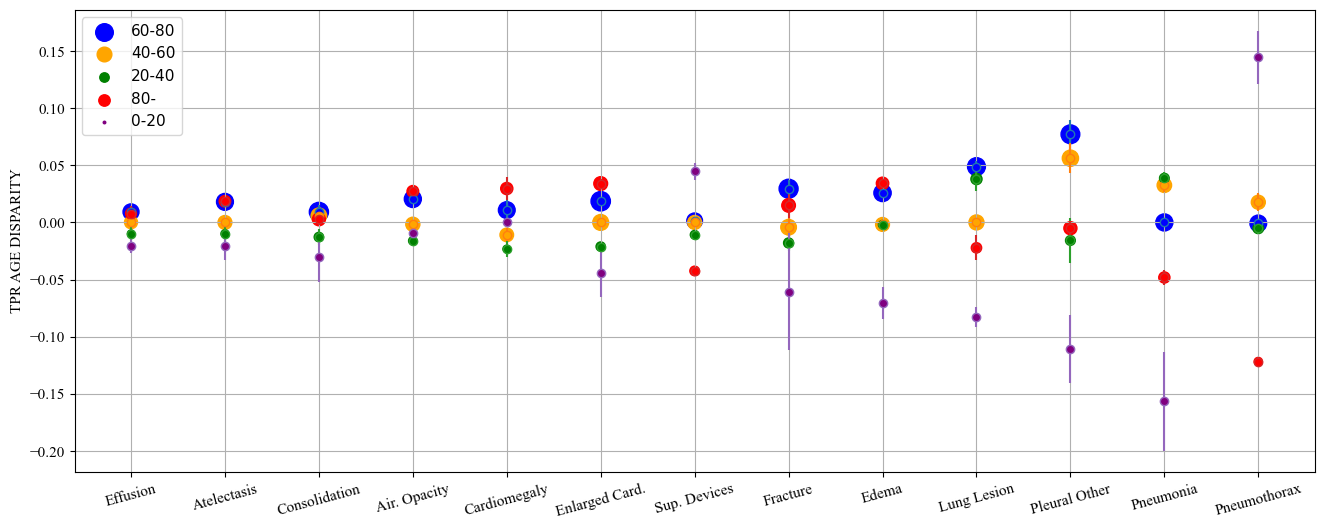

In [30]:
plt.rcParams.update({'font.size': font_size})
plt.figure(figsize=(16,height))

plt.figure(figsize=(16,height))
plt.scatter(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_60-80_mean'],
            s= np.multiply(age_tpr_disp_df['%60-80'],500), marker='o',color='blue', label="60-80")
plt.errorbar(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_60-80_mean'],
             yerr = age_tpr_disp_df['CI_60-80'],fmt='o',mfc='blue')
plt.scatter(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_40-60_mean'],
            s= np.multiply(age_tpr_disp_df['%40-60'],500), marker='o',color='orange', label="40-60")
plt.errorbar(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_40-60_mean'],
             yerr = age_tpr_disp_df['CI_40-60'],fmt='o',mfc='orange')
plt.scatter(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_20-40_mean'],
            s= np.multiply(age_tpr_disp_df['%20-40'],500), marker='o',color='green', label="20-40")
plt.errorbar(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_20-40_mean'],
             yerr = age_tpr_disp_df['CI_20-40'],fmt='o',mfc='green')
plt.scatter(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_80-_mean'],
            s= np.multiply(age_tpr_disp_df['%80-'],500), marker='o',color='red', label="80-")
plt.errorbar(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_80-_mean'],
             yerr = age_tpr_disp_df['CI_80-'],fmt='o',mfc='red')
plt.scatter(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_0-20_mean'],
            s= np.multiply(age_tpr_disp_df['%0-20'],500), marker='o',color='purple', label="0-20")
plt.errorbar(age_tpr_disp_df['diseases_abbr'],age_tpr_disp_df['Gap_0-20_mean'],
             yerr = age_tpr_disp_df['CI_0-20'],fmt='o',mfc='purple')


plt.xticks(rotation = rotation_degree,fontsize=font_size,fontname='Times New Roman')
plt.yticks(fontsize=font_size,fontname='Times New Roman')
plt.ylabel("TPR AGE DISPARITY",fontsize=font_size,fontname='Times New Roman')
plt.legend()
plt.grid(True)
plt.savefig(base_directory+"TPR_Dis_AGE.pdf",bbox_inches='tight')

## 3. Race

In [31]:
race_dataframes = [seed_19_race, seed_31_race, seed_38_race, seed_47_race, seed_77_race]
result_race_df= pd.concat(race_dataframes)

result_race_grouped =result_race_df.groupby("diseases")
result_race_grouped_stat = result_race_grouped.describe()

In [32]:
result_race_grouped_stat

%White                                     \
                            count      mean  std       min       25%   
diseases                                                               
Atelectasis                   5.0  0.677256  0.0  0.677256  0.677256   
Cardiomegaly                  5.0  0.653340  0.0  0.653340  0.653340   
Consolidation                 5.0  0.666732  0.0  0.666732  0.666732   
Edema                         5.0  0.662935  0.0  0.662935  0.662935   
Enlarged Cardiomediastinum    5.0  0.652582  0.0  0.652582  0.652582   
Fracture                      5.0  0.660525  0.0  0.660525  0.660525   
Lung Lesion                   5.0  0.656690  0.0  0.656690  0.656690   
Lung Opacity                  5.0  0.665128  0.0  0.665128  0.665128   
No Finding                    5.0  0.609506  0.0  0.609506  0.609506   
Pleural Effusion              5.0  0.688384  0.0  0.688384  0.688384   
Pleural Other                 5.0  0.619892  0.0  0.619892  0.619892   
Pneumonia                     5.0  0.658039  0.0  0.658039  0.658039   
Pneumothorax                  5.0  0.728803  0.0  0.728803  0.728803   
Support Devices               5.0  0.679420  0.0  0.679420  0.679420   

                                                         Gap_White            \
                                 50%       75%       max     count      mean   
diseases                                                                       
Atelectasis                 0.677256  0.677256  0.677256       5.0  0.007242   
Cardiomegaly                0.653340  0.653340  0.653340       5.0 -0.006330   
Consolidation               0.666732  0.666732  0.666732       5.0  0.018273   
Edema                       0.662935  0.662935  0.662935       5.0  0.013047   
Enlarged Cardiomediastinum  0.652582  0.652582  0.652582       5.0  0.023395   
Fracture                    0.660525  0.660525  0.660525       5.0  0.027808   
Lung Lesion                 0.656690  0.656690  0.656690       5.0 -0.036026   
Lung Opacity                0.665128  0.665128  0.665128       5.0  0.005368   
No Finding                  0.609506  0.609506  0.609506       5.0 -0.061274   
Pleural Effusion            0.688384  0.688384  0.688384       5.0  0.023858   
Pleural Other               0.619892  0.619892  0.619892       5.0  0.004635   
Pneumonia                   0.658039  0.658039  0.658039       5.0 -0.036493   
Pneumothorax                0.728803  0.728803  0.728803       5.0 -0.001924   
Support Devices             0.679420  0.679420  0.679420       5.0 -0.006796   

                            ... %American           Gap_American            \
                            ...       75%       max        count      mean   
diseases                    ...                                              
Atelectasis                 ...  0.010677  0.010677          5.0 -0.007242   
Cardiomegaly                ...  0.011700  0.011700          5.0  0.006330   
Consolidation               ...  0.010338  0.010338          5.0 -0.018581   
Edema                       ...  0.011930  0.011930          5.0 -0.030855   
Enlarged Cardiomediastinum  ...  0.014236  0.014236          5.0 -0.036411   
Fracture                    ...  0.012965  0.012965          5.0 -0.033471   
Lung Lesion                 ...  0.012272  0.012272          5.0  0.119500   
Lung Opacity                ...  0.011012  0.011012          5.0 -0.005368   
No Finding                  ...  0.013053  0.013053          5.0 -0.097413   
Pleural Effusion            ...  0.010649  0.010649          5.0 -0.032434   
Pleural Other               ...  0.015806  0.015806          5.0  0.025172   
Pneumonia                   ...  0.011808  0.011808          5.0  0.036493   
Pneumothorax                ...  0.005502  0.005502          5.0  0.115650   
Support Devices             ...  0.012570  0.012570          5.0  0.014950   

                                                                              \
                                 s

In [33]:
race_tpr_disp=pd.DataFrame(pd.DataFrame(diseases, columns=["diseases"]))

In [34]:
race_df_white_mean = result_race_grouped_stat['%White']['mean']
race_df_white_gap = result_race_grouped_stat['Gap_White']["mean"]
race_df_white_ci= significance_level * result_race_grouped_stat['Gap_White']["std"] / np.sqrt(number_of_runs)

In [35]:
race_df_black_mean = result_race_grouped_stat['%Black']['mean']
race_df_black_gap = result_race_grouped_stat['Gap_Black']["mean"]
race_df_black_ci= significance_level * result_race_grouped_stat['Gap_Black']["std"] / np.sqrt(number_of_runs)

In [36]:
race_df_hisp_mean = result_race_grouped_stat['%Hisp']['mean']
race_df_hisp_gap = result_race_grouped_stat['Gap_Hisp']["mean"]
race_df_hisp_ci= significance_level * result_race_grouped_stat['Gap_Hisp']["std"] / np.sqrt(number_of_runs)


In [37]:
race_df_other_mean = result_race_grouped_stat['%Other']['mean']
race_df_other_gap = result_race_grouped_stat['Gap_Other']["mean"]
race_df_other_ci= significance_level * result_race_grouped_stat['Gap_Other']["std"] / np.sqrt(number_of_runs)


In [38]:
race_df_asian_mean = result_race_grouped_stat['%Asian']['mean']
race_df_asian_gap = result_race_grouped_stat['Gap_Asian']["mean"]
race_df_asian_ci= significance_level * result_race_grouped_stat['Gap_Asian']["std"] / np.sqrt(number_of_runs)

In [39]:
race_df_american_mean = result_race_grouped_stat['%American']['mean']
race_df_american_gap = result_race_grouped_stat['Gap_American']["mean"]
race_df_american_ci= significance_level * result_race_grouped_stat['Gap_American']["std"] / np.sqrt(number_of_runs)


In [40]:
percent_asian_list = []
ci_asian_list = []
gap_asian_mean_list = []


ci_american_list = []
percent_american_list = []
gap_american_mean_list = []

percent_white_list = []
ci_white_list = []
gap_white_mean_list = []

percent_black_list = []
ci_black_list = []
gap_black_mean_list = []

percent_hisp_list = []
ci_hisp_list = []
gap_hisp_mean_list = []

percent_other_list = []
ci_other_list = []
gap_other_mean_list = []

diseases_abbr_list = []
distance_list = []


In [41]:
for disease in diseases:
    mean_list = []
    percent_black_list.append(race_df_black_mean[disease])
    gap_black_mean_list.append(race_df_black_gap[disease])
    ci_black_list.append(race_df_black_ci[disease])
    mean_list.append(race_df_black_gap[disease])

    percent_hisp_list.append(race_df_hisp_mean[disease])
    gap_hisp_mean_list.append(race_df_hisp_gap[disease])
    ci_hisp_list.append(race_df_hisp_ci[disease])
    mean_list.append(race_df_hisp_gap[disease])

    percent_other_list.append(race_df_other_mean[disease])
    gap_other_mean_list.append(race_df_other_gap[disease])
    ci_other_list.append(race_df_other_ci[disease])
    mean_list.append(race_df_other_gap[disease])

    percent_white_list.append(race_df_white_mean[disease])
    gap_white_mean_list.append(race_df_white_gap[disease])
    ci_white_list.append(race_df_white_ci[disease])
    mean_list.append(race_df_white_gap[disease])

    percent_asian_list.append(race_df_asian_mean[disease])
    gap_asian_mean_list.append(race_df_asian_gap[disease])
    ci_asian_list.append(race_df_asian_ci[disease])
    mean_list.append(race_df_asian_gap[disease])

    percent_american_list.append(race_df_american_mean[disease])
    gap_american_mean_list.append(race_df_american_gap[disease])
    ci_american_list.append(race_df_american_ci[disease])
    mean_list.append(race_df_american_gap[disease])

    cleaned_mean_list= [x for x in mean_list if str(x) != 'nan']

    distance_list.append(np.max(cleaned_mean_list) - np.min(cleaned_mean_list))

    diseases_abbr_list.append(diseases_abbr[disease])

In [42]:
d = {'diseases': diseases, 'diseases_abbr': diseases_abbr_list, 'Distance': distance_list,
     "%White": percent_white_list, 'Gap_W_mean': gap_white_mean_list, 'CI_W': ci_white_list,
     "%Black": percent_white_list, 'Gap_B_mean': gap_black_mean_list, 'CI_B': ci_black_list,
     "%Hisp": percent_hisp_list, 'Gap_H_mean': gap_hisp_mean_list, 'CI_H': ci_hisp_list,
     "%Other": percent_other_list, 'Gap_Ot_mean': gap_other_mean_list, 'CI_Ot': ci_other_list,
     "%Asian": percent_asian_list, 'Gap_As_mean': gap_asian_mean_list, 'CI_As': ci_asian_list,
     "%American": percent_american_list, 'Gap_Am_mean': gap_american_mean_list, 'CI_Am': ci_american_list
     }
race_tpr_disp_df = pd.DataFrame(d)
race_tpr_disp_df = race_tpr_disp_df.sort_values(by ='Distance')
race_tpr_disp_df.to_csv(base_directory+"race_tpr_disp.csv")

In [44]:
race_tpr_disp_img=pd.read_csv("./TPR_GAPS/race_tpr_disp_img.csv")
race_tpr_disp_img

,Unnamed: 0,diseases,diseases_abbr,Distance,%White,Gap_W_mean,CI_W,%Black,Gap_B_mean,CI_B,...,CI_H,%Other,Gap_Ot_mean,CI_Ot,%Asian,Gap_As_mean,CI_As,%American,Gap_Am_mean,CI_Am
0,12,Support Devices,Sup. Devices,0.076606,0.679420,-0.012115,0.004584,0.679420,-0.032110,0.008355,...,0.009984,0.099730,0.011711,0.006920,0.082970,-0.005808,0.003828,0.012570,0.044496,0.016016
1,5,Enlarged Cardiomediastinum,Enlarged Card.,0.097883,0.652582,0.014706,0.008870,0.652582,-0.035233,0.012206,...,0.005642,0.131228,0.052187,0.010887,0.104574,0.048567,0.011855,0.014236,-0.017874,0.012653
2,8,Pleural Effusion,Effusion,0.098032,0.688384,0.019218,0.005912,0.688384,-0.041146,0.011399,...,0.011581,0.095909,0.016788,0.010401,0.087502,0.048179,0.014442,0.010649,-0.049853,0.025305
3,4,Edema,Edema,0.110709,0.662935,0.006338,0.011195,0.662935,-0.053366,0.019889,...,0.013788,0.116821,0.057343,0.019000,0.085345,0.036329,0.020973,0.011930,-0.024299,0.026588
4,2,Cardiomegaly,Cardiomegaly,0.181967,0.653340,-0.004444,0.009134,0.653340,-0.061625,0.023902,...,0.012431,0.110517,0.078762,0.006938,0.087919,0.071851,0.010003,0.011700,0.004444,0.009134
5,11,Pneumothorax,Pneumothorax,0.188163,0.728803,0.017675,0.021842,0.728803,-0.145638,0.039503,...,0.062575,0.088997,0.042525,0.016825,0.089320,0.040549,0.026049,0.005502,-0.008812,0.075035
6,6,Fracture,Fracture,0.208525,0.660525,0.027014,0.015324,0.660525,-0.061952,0.011073,...,0.012910,0.128625,0.032065,0.022051,0.129649,0.146573,0.020281,0.012965,-0.025006,0.031624
7,7,Lung Lesion,Lung Lesion,0.224339,0.656690,-0.029712,0.007139,0.656690,-0.080227,0.021209,...,0.019063,0.117330,0.035975,0.014167,0.112242,0.057498,0.018164,0.012272,0.076854,0.032073
8,1,Atelectasis,Atelectasis,0.239835,0.677256,0.021083,0.011087,0.677256,-0.133210,0.013558,...,0.019741,0.107296,0.072230,0.015149,0.090490,0.106625,0.017889,0.010677,-0.021083,0.011087
9,0,Lung Opacity,Air. Opacity,0.245402,0.665128,0.004157,0.009867,0.665128,-0.132367,0.020449,...,0.016901,0.112625,0.095942,0.008000,0.089933,0.113035,0.008665,0.011012,-0.004157,0.009867


In [65]:
legend_patches = [
    Line2D([0], [0], marker='v', color='w', markerfacecolor='blue', markersize=10, label='Baseline(Image)'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Embedding')]


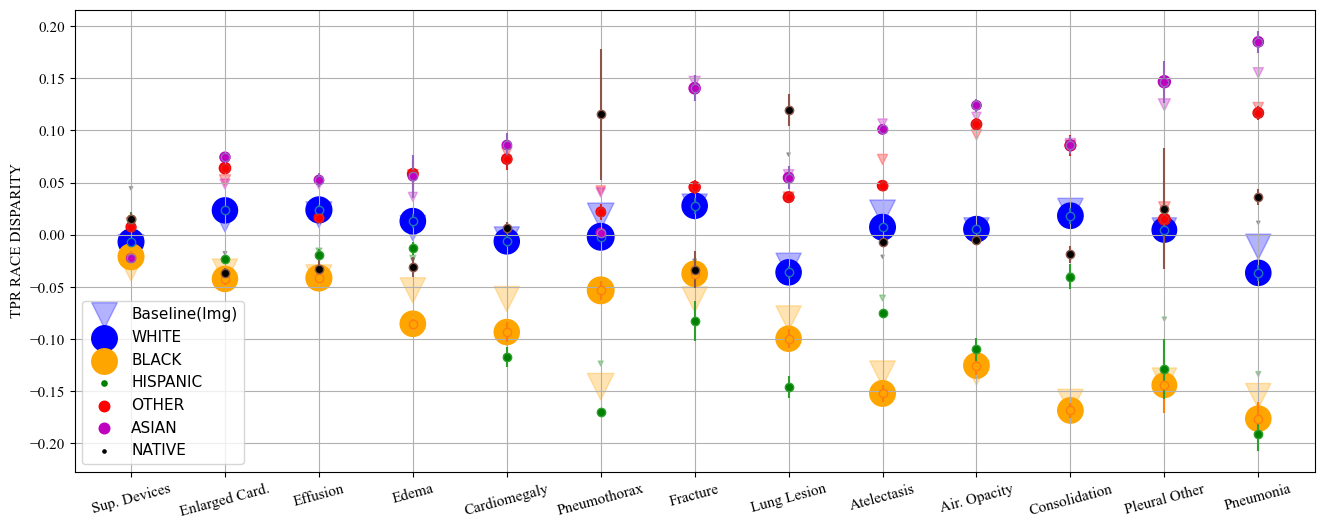

In [75]:
# Ensure TrueType fonts are used
plt.rcParams.update({'font.size': font_size})
plt.figure(figsize=(16,height))

#region  ==================== Baseline============================
plt.scatter(race_tpr_disp_img['diseases_abbr'],race_tpr_disp_img['Gap_W_mean'],
            s= np.multiply(race_tpr_disp_img['%White'],500), marker='v',color='blue',label="Baseline(Img)",alpha=0.30)
# plt.errorbar(race_tpr_disp_img['diseases_abbr'],race_tpr_disp_img['Gap_W_mean'],
#              yerr = race_tpr_disp_img['CI_W'],fmt='v',mfc='blue',alpha=0.30)#ecolor='blue'

plt.scatter(race_tpr_disp_img['diseases_abbr'],race_tpr_disp_img['Gap_B_mean'],
            s= np.multiply(race_tpr_disp_img['%Black'],500), marker='v',color='orange',alpha=0.30)
# plt.errorbar(race_tpr_disp_img['diseases_abbr'],race_tpr_disp_img['Gap_B_mean'],
#              yerr = race_tpr_disp_img['CI_B'],fmt='v',mfc='orange')

plt.scatter(race_tpr_disp_img['diseases_abbr'],race_tpr_disp_img['Gap_H_mean'],
            s= np.multiply(race_tpr_disp_img['%Hisp'],500), marker='v',color='green',alpha=0.30)
# plt.errorbar(race_tpr_disp_img['diseases_abbr'],race_tpr_disp_img['Gap_H_mean'],
#              yerr = race_tpr_disp_img['CI_H'],fmt='v',mfc='green')

plt.scatter(race_tpr_disp_img['diseases_abbr'],race_tpr_disp_img['Gap_Ot_mean'],
            s= np.multiply(race_tpr_disp_img['%Other'],500), marker='v',color='r',alpha=0.30)
# plt.errorbar(race_tpr_disp_img['diseases_abbr'],race_tpr_disp_img['Gap_Ot_mean'],
#              yerr = race_tpr_disp_img['CI_Ot'],fmt='v',mfc='r')

plt.scatter(race_tpr_disp_img['diseases_abbr'],race_tpr_disp_img['Gap_As_mean'],
            s= np.multiply(race_tpr_disp_img['%Asian'],500), marker='v',color='m',alpha=0.30)
# plt.errorbar(race_tpr_disp_img['diseases_abbr'],race_tpr_disp_img['Gap_As_mean']
#              ,yerr = race_tpr_disp_img['CI_As'],fmt='v',mfc='m')

plt.scatter(race_tpr_disp_img['diseases_abbr'],race_tpr_disp_img['Gap_Am_mean'],
            s= np.multiply(race_tpr_disp_img['%American'],500), marker='v',color='k',alpha=0.30)
# plt.errorbar(race_tpr_disp_img['diseases_abbr'],race_tpr_disp_img['Gap_Am_mean'],
#              yerr = race_tpr_disp_img['CI_Am'],fmt='v',mfc='k')
#endregion


#region Embedding =========================================================================
plt.scatter(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_W_mean'],
            s= np.multiply(race_tpr_disp_df['%White'],500), marker='o',color='blue', label="WHITE")
plt.errorbar(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_W_mean'],
             yerr = race_tpr_disp_df['CI_W'],fmt='o',mfc='blue')#ecolor='blue'

plt.scatter(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_B_mean'],
            s= np.multiply(race_tpr_disp_df['%Black'],500), marker='o',color='orange', label="BLACK")
plt.errorbar(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_B_mean'],
             yerr = race_tpr_disp_df['CI_B'],fmt='o',mfc='orange')

plt.scatter(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_H_mean'],
            s= np.multiply(race_tpr_disp_df['%Hisp'],500), marker='o',color='green', label="HISPANIC")
plt.errorbar(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_H_mean'],
             yerr = race_tpr_disp_df['CI_H'],fmt='o',mfc='green')

plt.scatter(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_Ot_mean'],
            s= np.multiply(race_tpr_disp_df['%Other'],500), marker='o',color='r', label="OTHER")
plt.errorbar(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_Ot_mean'],
             yerr = race_tpr_disp_df['CI_Ot'],fmt='o',mfc='r')

plt.scatter(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_As_mean'],
            s= np.multiply(race_tpr_disp_df['%Asian'],500), marker='o',color='m', label="ASIAN")
plt.errorbar(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_As_mean']
             ,yerr = race_tpr_disp_df['CI_As'],fmt='o',mfc='m')

plt.scatter(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_Am_mean'],
            s= np.multiply(race_tpr_disp_df['%American'],500), marker='o',color='k', label="NATIVE")
plt.errorbar(race_tpr_disp_df['diseases_abbr'],race_tpr_disp_df['Gap_Am_mean'],
             yerr = race_tpr_disp_df['CI_Am'],fmt='o',mfc='k')

#endregion

# legend = plt.legend(handles=legend_patches,bbox_to_anchor=(2, 2.5), ncol=3, fontsize=font_size, frameon=False)
legend = plt.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), ncol=1, fontsize=font_size, frameon=False)
# Manually set font for all legend text
for text in legend.get_texts():
    text.set_fontname('Times New Roman')

#bbox_to_anchor=(2, 2.5), ncol=3, fontsize=font_size, frameon=False

plt.xticks(rotation=rotation_degree,fontsize=font_size,fontname='Times New Roman')
plt.yticks(fontsize=font_size,fontname='Times New Roman')
plt.ylabel("TPR RACE DISPARITY",fontsize=font_size,fontname='Times New Roman')
plt.legend()
plt.grid(True)
plt.savefig(base_directory+"TPR_Dis_RACE.pdf",bbox_inches='tight')